In [1]:
import subprocess
import time
import json
import matplotlib.pyplot as plt 
import csv 
import pandas as pd
from datetime import datetime
import numpy as np
import seaborn as sns  
import pickle
from itertools import islice

In [2]:
fee_per_vbyte_block_csv = open('/home/oscar/jufobtc/code/fee_vybte_per_block_650000_657000.csv','r')
colnames = ['time_stamp', 'block_height', 'avg_fee_block']
df_avg_fee_block = pd.read_csv(fee_per_vbyte_block_csv,delimiter=' ', names=colnames)
print(df_avg_fee_block)

       time_stamp  block_height  avg_fee_block
0      1601077461        650001      22.292135
1      1601077784        650002      21.040189
2      1601078147        650003      33.012255
3      1601078753        650004      51.644981
4      1601078976        650005      20.168499
...           ...           ...            ...
64593  1639145517        713534      11.640212
64594  1639146180        713535      14.180824
64595  1639146337        713536       7.437159
64596  1639146565        713537      11.706733
64597  1639147370        713538      17.472593

[64598 rows x 3 columns]


In [3]:
current_block_height = 0 
temp_block_height = 0
fee_per_vbyte = 0
i = 0
block_sum_fees = 0
block_count = 0
#dict_mempool = open('/home/oscar/jufobtc/dict_mempool_start_600000.pkl', 'r')

conf_time_csv = open('/home/oscar/jufobtc/code/test_comp_time.csv','r')
colnames = ['time_stamp', 'conf_time','block_height']
df_conf_time = pd.read_csv(conf_time_csv,delimiter=' ', names=colnames)
print('df loaded')
print(df_conf_time)




df loaded
                                                time_stamp   conf_time  \
0        c17d8179d792928bb017d12654cd12c72aca35ca0cb258...     211.065   
1        a795b27a52e74f07bf9def3edad50a06db902ee173d30b...     114.680   
2        c1b7b41cc7bc40fe528a08528ae150e2fdab6aa8501dd1...     142.606   
3        35064cb6846becca4594ccb45814a838039be1f08d3c04...      85.338   
4        d063d5ed3e9dcb4510fe39ef31ac4240acd8b30fe34a48...     128.941   
...                                                    ...         ...   
9898468  9e9e68b63fadc90bb9e7b7d302feb3800ac1254348c13f...  316571.426   
9898469  4bb480f0af9f507f0633931060a6c005c02678efae645c...  316289.973   
9898470  fc854fd00b9d59f63454fcdfec7783a08e81e84b666742...  316239.989   
9898471  895305646042c170f87606a5dfd63cfe2f2fd5872d484f...  316611.909   
9898472  a32fdcc34609289d06fb73e5faefd505585d0600beac8b...  316611.909   

         block_height  
0              650000  
1              650000  
2              650000  
3    

In [4]:
fee_per_txblock_650000_659998_csv = open('/home/oscar/jufobtc/fee_block_650000_659998.csv','r')
df_tx_fee = pd.read_csv(fee_per_txblock_650000_659998_csv,delimiter=' ', names=['tx_hash', 'tx_fee','block_height'])
print(df_tx_fee)

                                                    tx_hash      tx_fee  \
0         8143b3b341f665b22adcb8489158356c03f7c93cf4e4fa...    0.000000   
1         c17d8179d792928bb017d12654cd12c72aca35ca0cb258...  475.270769   
2         a795b27a52e74f07bf9def3edad50a06db902ee173d30b...  338.053097   
3         c1b7b41cc7bc40fe528a08528ae150e2fdab6aa8501dd1...  332.492147   
4         35064cb6846becca4594ccb45814a838039be1f08d3c04...  301.204819   
...                                                     ...         ...   
21359491  76daccf3b2067d63e6176f65d0cb4a576da19d83c3c479...    8.064343   
21359492  b2ceb2cf53b224917093c9d2639660976fdc2be3c7c92d...    8.064343   
21359493  5f376f04982af7066200a04ad4e490c1733055ffe8857b...    8.064343   
21359494  69e9cf4af9f34f21498942cf8e2fcb286b6527b2b4eeb7...    8.060150   
21359495  6d3c661fa221649e20e8f960e60231e691836452394189...    8.046243   

          block_height  
0               650000  
1               650000  
2               650000  

In [6]:
df_conf_time_fee_per_tx = pd.DataFrame(columns=['tx_hash','conf_time','tx_fee','block_height'])
df_conf_time_fee_per_tx['tx_hash'] = df_tx_fee['tx_hash']
df_conf_time_fee_per_tx['conf_time'] = df_conf_time['conf_time']
df_conf_time_fee_per_tx['tx_fee'] = df_tx_fee['tx_fee']
df_conf_time_fee_per_tx['conf_time'] = df_conf_time_fee_per_tx['conf_time']/3600 # in h umgerechnet
df_conf_time_fee_per_tx['block_height'] = df_tx_fee['block_height']
print(df_conf_time_fee_per_tx)


                                                    tx_hash  conf_time  \
0         8143b3b341f665b22adcb8489158356c03f7c93cf4e4fa...   0.058629   
1         c17d8179d792928bb017d12654cd12c72aca35ca0cb258...   0.031856   
2         a795b27a52e74f07bf9def3edad50a06db902ee173d30b...   0.039613   
3         c1b7b41cc7bc40fe528a08528ae150e2fdab6aa8501dd1...   0.023705   
4         35064cb6846becca4594ccb45814a838039be1f08d3c04...   0.035817   
...                                                     ...        ...   
21359491  76daccf3b2067d63e6176f65d0cb4a576da19d83c3c479...        NaN   
21359492  b2ceb2cf53b224917093c9d2639660976fdc2be3c7c92d...        NaN   
21359493  5f376f04982af7066200a04ad4e490c1733055ffe8857b...        NaN   
21359494  69e9cf4af9f34f21498942cf8e2fcb286b6527b2b4eeb7...        NaN   
21359495  6d3c661fa221649e20e8f960e60231e691836452394189...        NaN   

              tx_fee  block_height  
0           0.000000        650000  
1         475.270769        650000  


Text(0.5, 1.0, 'Korrelation der Confirmation Time und Transaktionsgebühren der Transaktionen der Blocks 650000 bis 656000')

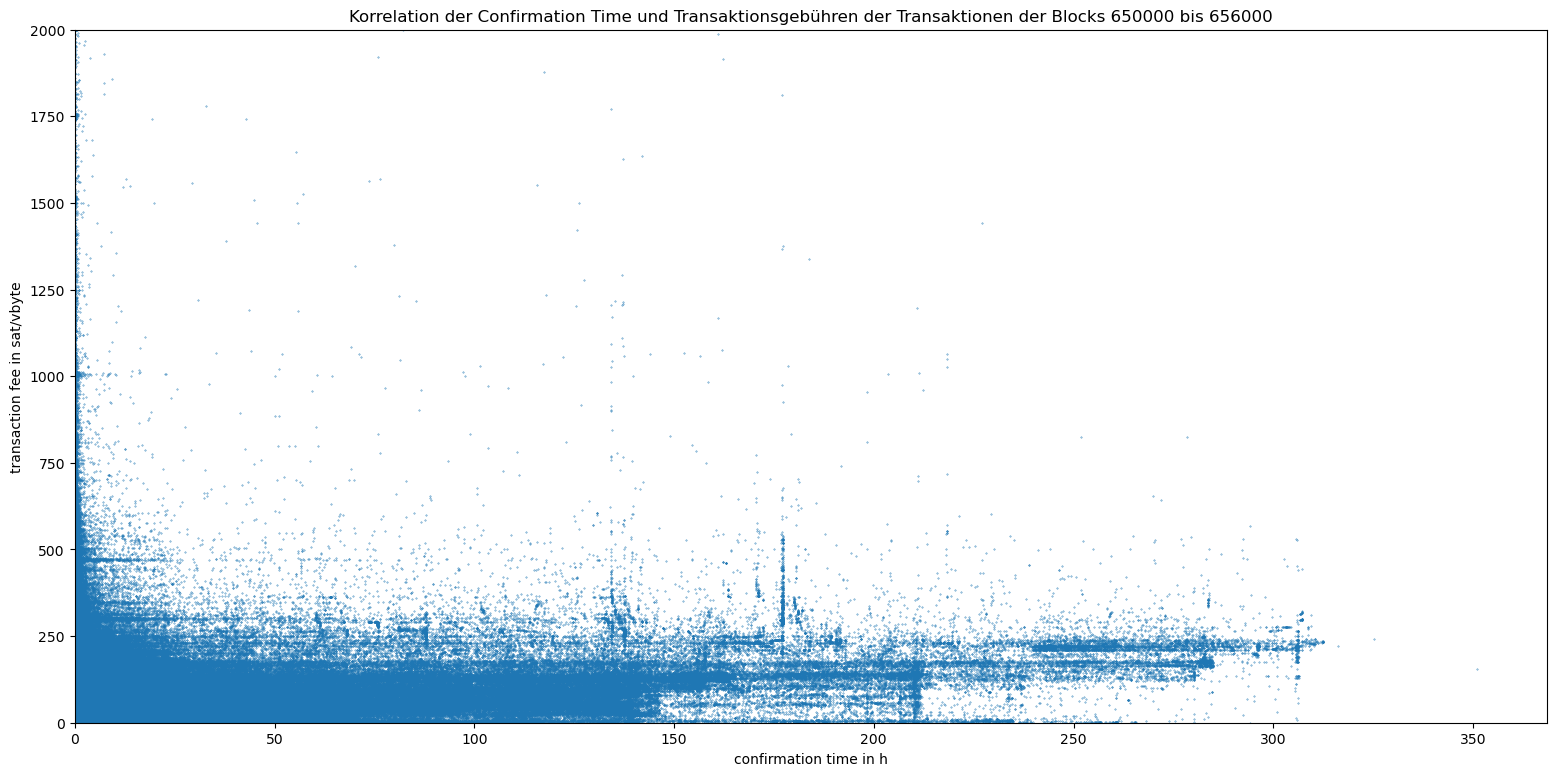

: 

In [52]:
plt.figure(figsize=(19,9))
start,end = df_conf_time_fee_per_tx['block_height'].min(), 656000
data_set = df_conf_time_fee_per_tx.loc[df_conf_time_fee_per_tx['block_height'] < end]
plt.scatter(x=data_set['conf_time'], y=data_set['tx_fee'], s=0.1)
plt.ylim(0, 2000)
plt.xlim(0)
plt.xlabel('confirmation time in h')
plt.ylabel('transaction fee in sat/vbyte')
plt.title('Korrelation der Confirmation Time und Transaktionsgebühren der Transaktionen der Blocks {} bis {}'.format(start, end))

650000
650010
650020
650030
650040
650050
650060
650070
650080
650090
650100
650110
650120
650130
650140
650150
650160
650170
650180
650190
650200


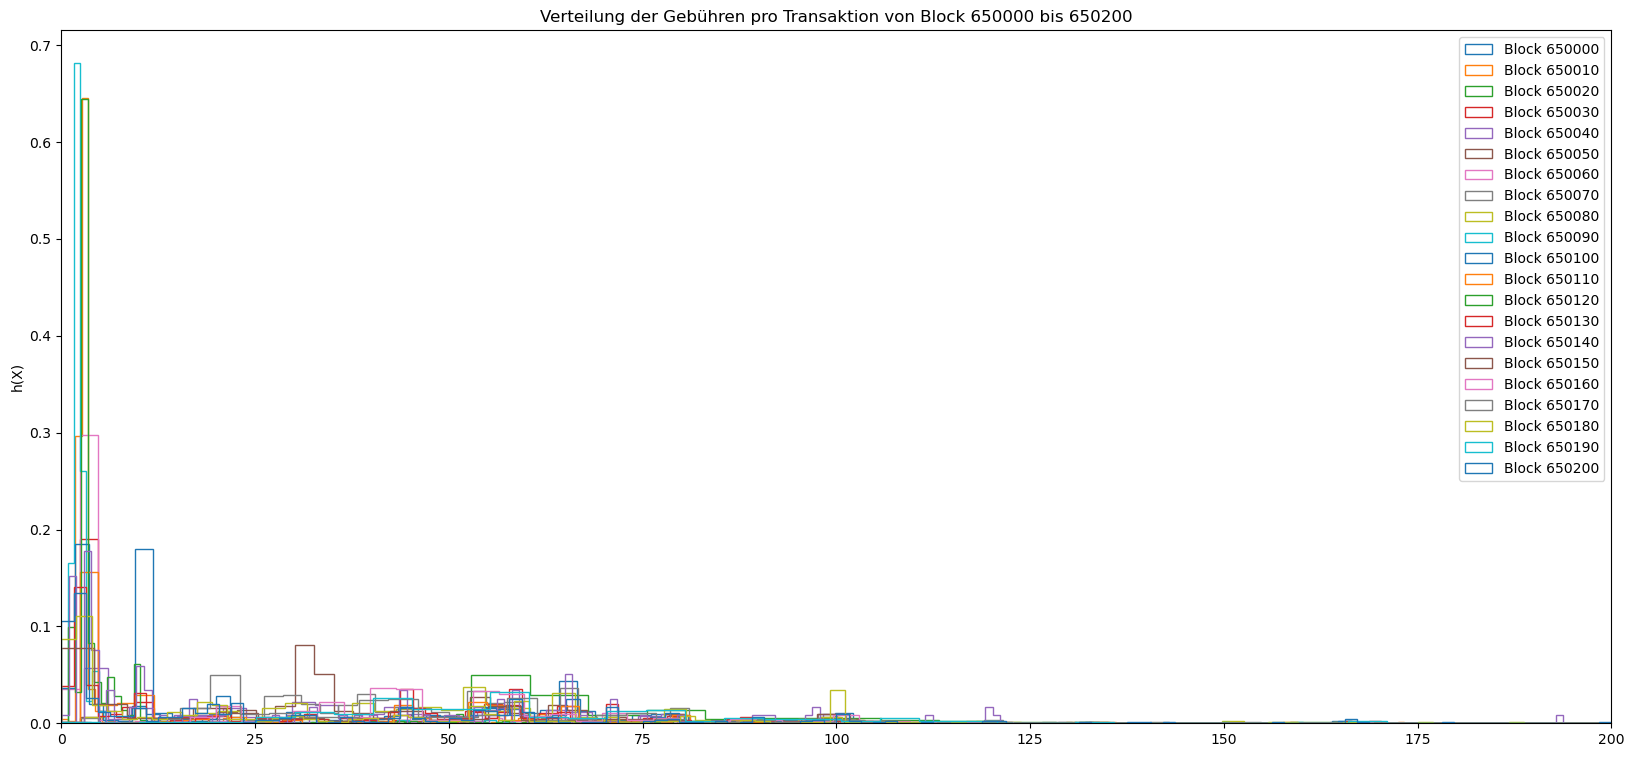

In [11]:
plt.figure(figsize=(20,9))
plt.xlim(None, 200)
plt.ylabel('h(X)')
start, end = df_tx_fee['block_height'].min(), (650200) 
#df_tx_fee['block_height'].max()
plt.title('Verteilung der Gebühren pro Transaktion von Block {} bis {}'.format(start, end))

for i in range(0,int(((end - 650000)/10)+1)):
    block_height = 650000 + i*10
    print(block_height)
    temp_df_tx_fee = df_tx_fee.loc[df_tx_fee['block_height']==block_height]
    label = 'Block ' + str((650000 + i*10))
    plt.hist(temp_df_tx_fee['tx_fee'], cumulative=False, density=True, histtype='step', bins=200, label=label)
    #plt.hist(temp_df_tx_fee['tx_fee'], cumulative=True, density=True, histtype='step', bins=100, label=label)
plt.legend()

#df_conf_time.plot()   

650000
650010
650020
650030
650040
650050
650060
650070
650080
650090
650100
650110
650120
650130
650140
650150
650160
650170
650180
650190
650200


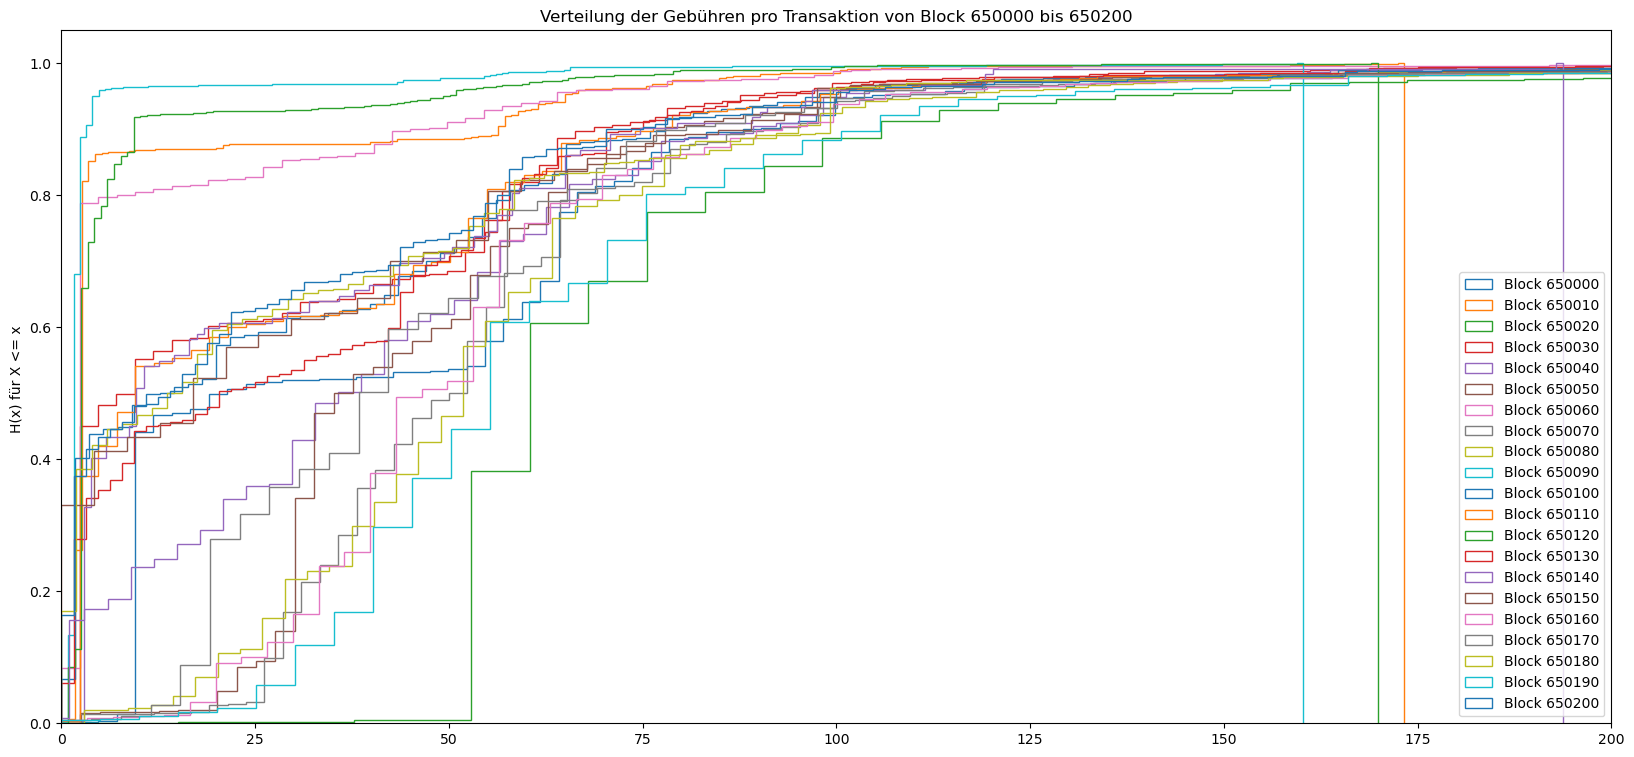

In [12]:
i = 0
plt.figure(figsize=(20,9))
plt.xlim(None, 200)
plt.ylabel('H(x) für X <= x ')
#start, end = df_tx_fee['block_height'].min(), df_tx_fee['block_height'].max()

plt.title('Verteilung der Gebühren pro Transaktion von Block {} bis {}'.format(start, end))
end = 650200
for i in range(0,int(((end - 650000)/10)+1)):
    block_height = 650000 + i*10
    print(block_height)
    temp_df_tx_fee = df_tx_fee.loc[df_tx_fee['block_height']==block_height]
    label = 'Block ' + str((650000 + i*10))
    plt.hist(temp_df_tx_fee['tx_fee'], cumulative=True, density=True, histtype='step', bins=200, label=label)
    #plt.hist(temp_df_tx_fee['tx_fee'], cumulative=True, density=True, histtype='step', bins=100, label=label)
    
plt.legend(loc='lower right')

In [26]:
df_block_fee_conf_time = pd.DataFrame(columns=['conf_time','avg_fee_block','block_height'])
df_block_fee_conf_time['conf_time'],df_block_fee_conf_time['block_height'] = df_conf_time['conf_time']/3600, df_conf_time['block_height']
print(df_block_fee_conf_time)
#df_block_fee_conf_time['avg_fee_block'] = df_avg_fee_block['avg_fee_block'].loc[df_avg_fee_block['block_height']==df_block_fee_conf_time['block_height']]
#dict_avg_fee_block = df_avg_fee_block.set_index('block_height').T.to_dict('list')
df_avg_fee_block_two_row = pd.DataFrame(columns=['block_height','avg_fee_block'])
df_avg_fee_block_two_row['block_height'],df_avg_fee_block_two_row['avg_fee_block'] = df_avg_fee_block['block_height'], df_avg_fee_block['avg_fee_block']
dict_avg_fee_block = dict(df_avg_fee_block_two_row.values)
#df_block_fee_conf_time['avg_fee_block'] = df_avg_fee_block['avg_fee_block']
df_block_fee_conf_time['avg_fee_block'] = df_block_fee_conf_time['block_height'].map(dict_avg_fee_block)
print(df_block_fee_conf_time)



         conf_time avg_fee_block  block_height
0         0.058629           NaN        650000
1         0.031856           NaN        650000
2         0.039613           NaN        650000
3         0.023705           NaN        650000
4         0.035817           NaN        650000
...            ...           ...           ...
9898468  87.936507           NaN        656225
9898469  87.858326           NaN        656225
9898470  87.844441           NaN        656225
9898471  87.947752           NaN        656225
9898472  87.947752           NaN        656225

[9898473 rows x 3 columns]
         conf_time  avg_fee_block  block_height
0         0.058629            NaN        650000
1         0.031856            NaN        650000
2         0.039613            NaN        650000
3         0.023705            NaN        650000
4         0.035817            NaN        650000
...            ...            ...           ...
9898468  87.936507      27.672018        656225
9898469  87.858326      

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


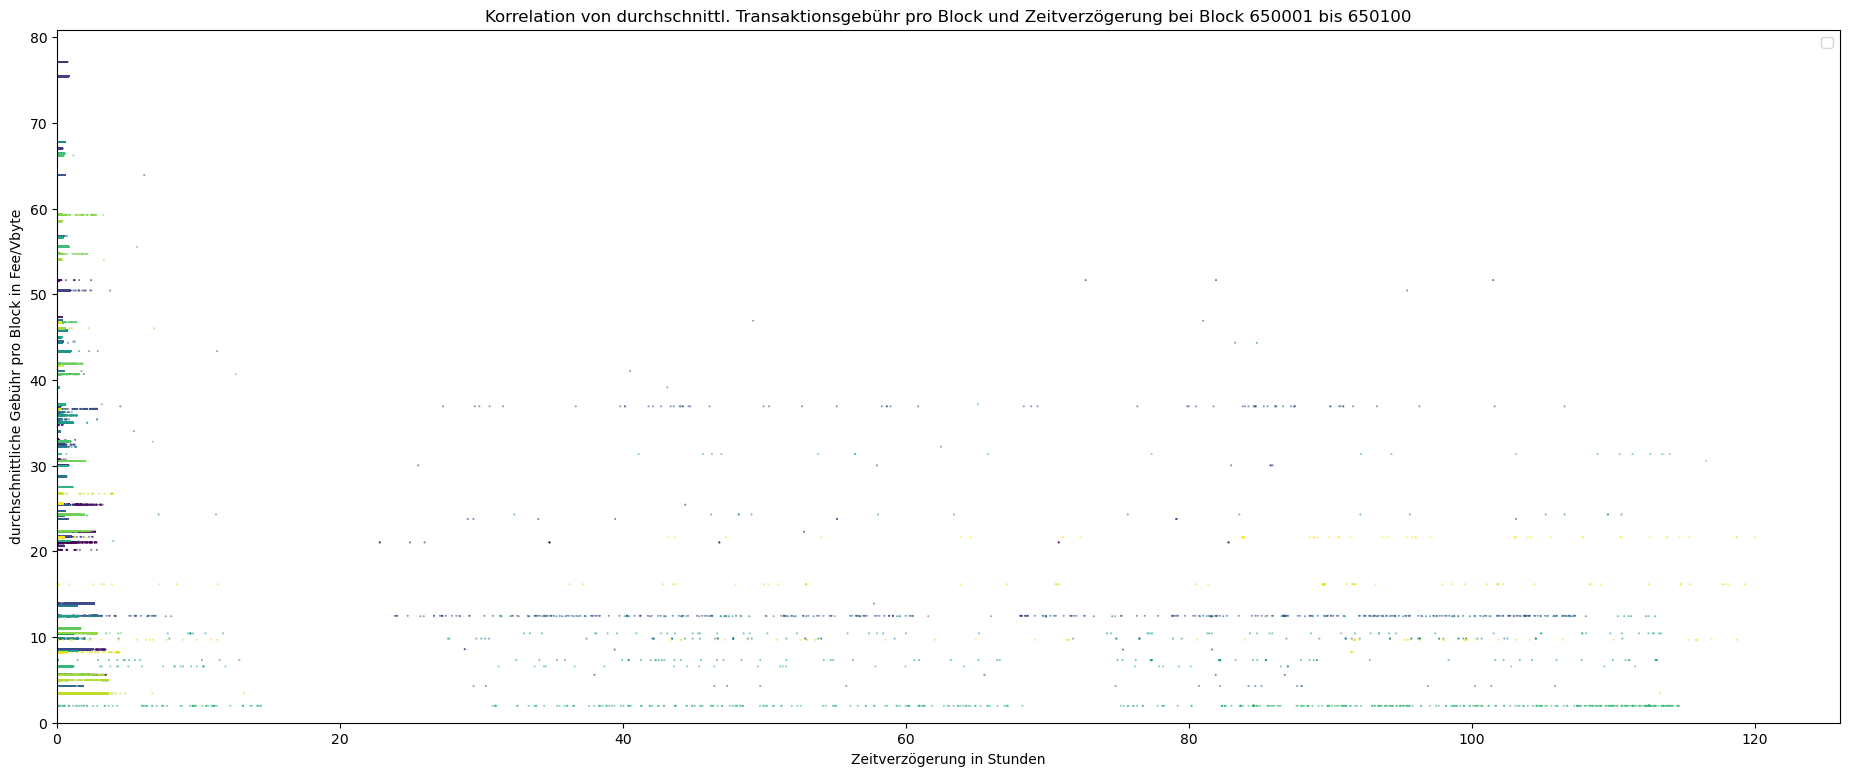

In [51]:
plt.figure(figsize=(23,9))
start, end = df_block_fee_conf_time['block_height'].min(), df_block_fee_conf_time['block_height'].max()
sub_df_block_fee_conf_time = pd.DataFrame(columns=['conf_time','avg_fee_block','block_height'])
start = 650000
end = 650100
temp_sub_df_block_fee_conf_time = df_block_fee_conf_time.loc[df_block_fee_conf_time['block_height'] < end+1]
sub_df_block_fee_conf_time = temp_sub_df_block_fee_conf_time.loc[temp_sub_df_block_fee_conf_time['block_height'] > start-1]
plt.title('Korrelation von durchschnittl. Transaktionsgebühr pro Block und Zeitverzögerung bei Block {} bis {}'.format(start+1, end))
plt.xlabel('Zeitverzögerung in Stunden')
plt.ylabel('durchschnittliche Gebühr pro Block in Fee/Vbyte')
plt.scatter(y=sub_df_block_fee_conf_time['avg_fee_block'],x=sub_df_block_fee_conf_time['conf_time'], s=0.1, c=sub_df_block_fee_conf_time.block_height),
plt.xlim(0,None)
plt.ylim(0,None)
plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


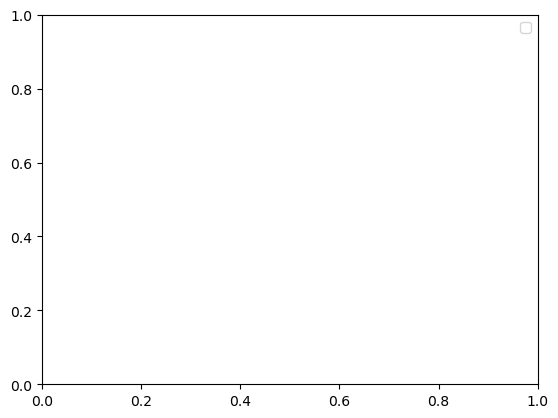